# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [3]:
import pandas as pd
df=pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'Species':iris.target
})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.to_csv('C:/Users/pillu/Desktop/code/ML/algorithms/iris.csv') 

In [5]:
x = df.drop('Species', axis = 1)

In [6]:
y = df['Species']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## lets import model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier()

In [10]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
rfc.score(x_test, y_test)

1.0

In [12]:
y_pred = rfc.predict(x_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Finding Important Features in Scikit-learn

In [14]:
feature_imp = pd.Series(rfc.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.449607
petal length (cm)    0.434373
sepal length (cm)    0.084862
sepal width (cm)     0.031158
dtype: float64

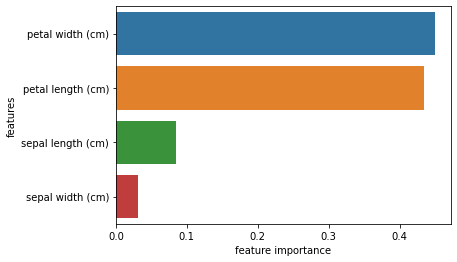

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x = feature_imp, y = feature_imp.index)
# adding lables
plt.xlabel("feature importance")
plt.ylabel('features')
#plt.heading('impotant features')
plt.show()

In [17]:
## from above we know that 'sepal width' has less importance so we can drop it
x1 = df[['Petal length', 'Petal width','Sepal length']]
#x.drop('sepal width')

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [19]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
rfc.score(x_test, y_test)

1.0

## new data findings


In [23]:
x.shape

(150, 4)

In [37]:
x_train[1:2].shape

(1, 3)

In [38]:
newd = x_train[1:2]

In [39]:
newd

,Petal length,Petal width,Sepal length
15,1.5,0.4,5.7


In [40]:
rfc.predict(newd)

array([0])

# pickel the model

In [42]:
import pickle

In [44]:
pickle.dump(rfc, open('randon_for.pkl', 'wb'))

In [45]:
## opening pickel file
new_rfc = pickle.load(open('randon_for.pkl', 'rb'))

In [46]:
new_rfc.predict(newd)

array([0])